In [1]:
import requests
import pandas as pd
import datetime 
import logging 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


logging.basicConfig(level=logging.DEBUG)
logging.getLogger("urllib3").setLevel(logging.WARNING)

class Binance_extraction():
    
    def __init__(self,interval,all_tickers):
        self.interval = interval
        self.all_tickers = all_tickers
        data = []
        
        for symbol in symbols:
            ohlc = self.get_data(symbol)
            symb_data = self.extract_data(ohlc,symbol)
            data = data + symb_data    
        
        self.all_tickers = (pd.DataFrame(data,columns=["close","date","symbol"]).pivot(index="date",columns="symbol",values="close"))
        
        
    def get_data(self,symbol):
        response = requests.get("https://api.binance.com/api/v1/klines?symbol={}&interval={}&limit=500".format(symbol,self.interval))
        #logging.debug("Get data from {}".format(symbol))    
        return response

    def extract_data(self,response,symbol):
       
        tickers = []
        data = response.json()
        #logging.debug("Processing data for {}".format(symbol))
        for item in data:
            open_ = item[1]
            high =  item[2]
            low =  item[3]
            close = float(item[4])
            volume = float(item[5])
            timestamp = item[6]
            timestamp = timestamp / 1000
            date = datetime.datetime.fromtimestamp(timestamp=timestamp).strftime('%Y-%m-%d')
            tickers.append((close,date,symbol))
              
        #logging.debug("Download {} day prices of ohlc data from {} pair".format(len(tickers),symbol))
       
        return tickers

if __name__ == "__main__":
    
    symbols = ["ETHBTC","LTCBTC","BNBBTC","NEOBTC"]
    all_tickers = pd.DataFrame()
    client = Binance_extraction("1d",all_tickers)
    
    
    
    

In [2]:
data = client.all_tickers
data.tail()

symbol,BNBBTC,ETHBTC,LTCBTC,NEOBTC
date,,,,
2018-12-08,0.001325,0.027341,0.007325,0.001777
2018-12-09,0.001357,0.026494,0.007119,0.001736
2018-12-10,0.001346,0.026300,0.007155,0.001776
2018-12-11,0.001349,0.026179,0.007036,0.001759
2018-12-12,0.001366,0.025873,0.006930,0.001713


In [3]:
# Convert the index to a datetime object 

data.index = pd.to_datetime(data.index)

data.describe(include="all")
data.tail(10)

symbol,BNBBTC,ETHBTC,LTCBTC,NEOBTC
date,,,,
2018-12-03,0.001269,0.028026,0.008114,0.001926
2018-12-04,0.001320,0.027983,0.007956,0.001898
2018-12-05,0.001497,0.027809,0.007870,0.001932
2018-12-06,0.001611,0.027266,0.007769,0.001865
2018-12-07,0.001398,0.025976,0.007615,0.001715
2018-12-08,0.001325,0.027341,0.007325,0.001777
2018-12-09,0.001357,0.026494,0.007119,0.001736
2018-12-10,0.001346,0.026300,0.007155,0.001776
2018-12-11,0.001349,0.026179,0.007036,0.001759


In [19]:
fig, ax = plt.subplots(figsize=(14,8))

ax1 = ax
ax2 = ax.twinx()

date_format = matplotlib.dates.DateFormatter('%Y-%m-%d')
data1 = data["ETHBTC"]
data2= data[["BNBBTC","LTCBTC","NEOBTC"]]

plt.xticks(rotation=70)
ax1.plot(data.index,data1,label="ETHBTC")
ax1.legend(loc=2)

ax1.xaxis.set_major_locator(date_format)
ax1.xaxis.set_major_formatter(date_format)

ax2.plot(data.index,data2)
ax2.xaxis.set_major_locator(date_format)
ax2.legend([i for i in data2.columns],loc=0)

ax2.xaxis.set_major_formatter(date_format)
#plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

TypeError: __call__() missing 1 required positional argument: 'x'

In [5]:
# Correlation matrix for all the assets prices during the period
data.corr()

symbol,BNBBTC,ETHBTC,LTCBTC,NEOBTC
symbol,,,,
BNBBTC,1.000000,0.003376,-0.001293,-0.047272
ETHBTC,0.003376,1.000000,0.760434,0.867558
LTCBTC,-0.001293,0.760434,1.000000,0.754735
NEOBTC,-0.047272,0.867558,0.754735,1.000000


In [6]:
# Observe the percentage change for the assets and plot them 
pct_change_data = data.pct_change()
pct_change_data.describe()

symbol,BNBBTC,ETHBTC,LTCBTC,NEOBTC
count,499.000000,499.000000,499.000000,499.000000
mean,0.010919,-0.001099,-0.000292,0.001962
std,0.093321,0.042559,0.050846,0.078605
min,-0.295877,-0.215729,-0.211677,-0.235312
25%,-0.026316,-0.020844,-0.022539,-0.033927
50%,-0.001925,-0.003082,-0.004481,-0.006569
75%,0.025001,0.015088,0.014542,0.020585
max,0.839639,0.237785,0.442384,0.603635


The table above show that 

In [7]:
# Calculate the mean and standard deviation for the asset returns 

ETHBTC_mu = pct_change_data["ETHBTC"].mean()
print(ETHBTC_mu)
ETHBTC_std = pct_change_data["ETHBTC"].std()
print(ETHBTC_std)

BNBBTC_mu = pct_change_data["BNBBTC"].mean()
BNBBTC_std = pct_change_data["BNBBTC"].std()

LTCBTC_mu = pct_change_data["LTCBTC"].mean()
LTCBTC_std = pct_change_data["LTCBTC"].std()

NEOBTC_mu = pct_change_data["NEOBTC"].mean()
NEOBTC_std = pct_change_data["NEOBTC"].std()

-0.0010988168343373905
0.042559341300073376


C:\Users\Nicolas\Anaconda3-5\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


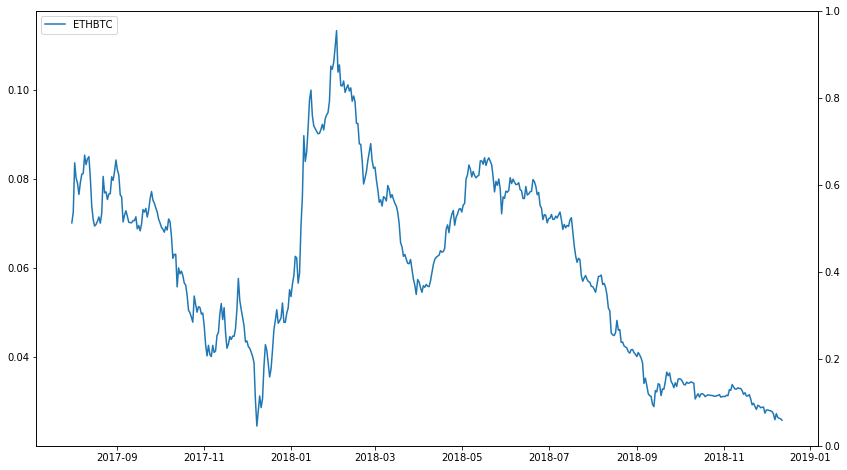

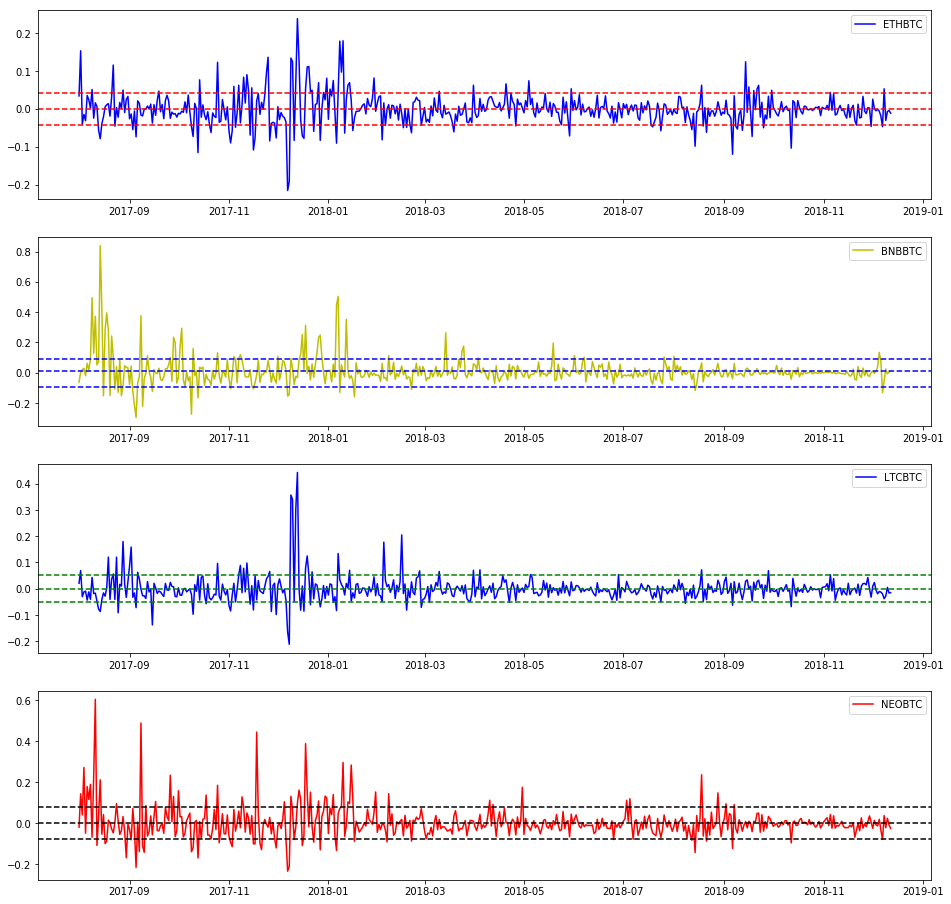

In [8]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(4,1,1)
#x = ax.set_xticklabels(pct_change_data.index)

ax1 = fig.add_subplot(4,1,1)
# Plot the data
ax1.plot(pct_change_data["ETHBTC"],label="ETHBTC",color='b')
ax1.legend()
# Plot the mean and std

ax1.axhline(ETHBTC_mu, label='Mean', linestyle='--',color='red')
ax1.axhline(ETHBTC_std, label="+ 1 std", linestyle='--',color='red')
ax1.axhline(-ETHBTC_std, label="- 1 std", linestyle='--',color='red')

# Plot the data
ax2 = fig.add_subplot(4,1,2)
ax2.plot(pct_change_data["BNBBTC"],label="BNBBTC", color='y')
ax2.legend()

# Plot the mean and std

ax2.axhline(BNBBTC_mu, label='Mean', linestyle='--',color='blue')
ax2.axhline(BNBBTC_std, label="+ 1 std", linestyle='--',color='blue')
ax2.axhline(-BNBBTC_std, label="- 1 std", linestyle='--',color='blue')

# Plot the data 
ax3 = fig.add_subplot(4,1,3)

ax3.plot(pct_change_data["LTCBTC"],label="LTCBTC",color='b')
ax3.legend()

# Plot the mean and std

ax3.axhline(LTCBTC_mu, label='Mean', linestyle='--',color='green')
ax3.axhline(LTCBTC_std, label="+ 1 std", linestyle='--',color='green')
ax3.axhline(-LTCBTC_std, label="- 1 std", linestyle='--',color='green')

# Plot the data 
ax4 = fig.add_subplot(4,1,4)
ax4.plot(pct_change_data["NEOBTC"],label="NEOBTC",color='r')
ax4.legend()

ax4.axhline(NEOBTC_mu, label='Mean', linestyle='--',color='black')
ax4.axhline(NEOBTC_std, label="+ 1 std", linestyle='--',color='black')
ax4.axhline(-NEOBTC_std, label="- 1 std", linestyle='--',color='black')


#pct_change_data.plot(figsize=(16,8))
plt.show()

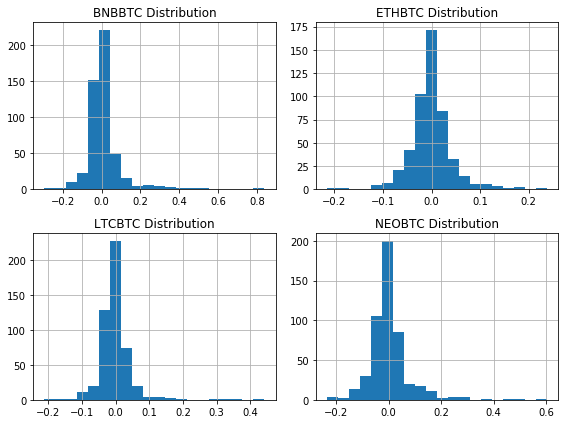

In [9]:
# Distribution of assets retunrs 
def draw_histograms(df, assets, n_rows, n_cols):
    fig=plt.figure(figsize=(8,6))
    for i, asset in enumerate(assets):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[asset].hist(bins=20,ax=ax)
        ax.set_title(asset+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

#test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))

draw_histograms(pct_change_data, pct_change_data.columns, 2, 2)


In [10]:
import scipy.stats as stats 
# Perform test for normal distribution of the assets returns with the normaltest function provided by spcipy.stats. The null 
# hypotesis of this test is that the series comes from a normal distribution

pct_change_data = pct_change_data.dropna()
result = {}
for asset in pct_change_data:
    result[asset] = stats.normaltest(pct_change_data[asset])
    
    
print(result)

{'BNBBTC': NormaltestResult(statistic=371.264671225405, pvalue=2.403814666298386e-81), 'ETHBTC': NormaltestResult(statistic=91.88509758256026, pvalue=1.115333059746848e-20), 'LTCBTC': NormaltestResult(statistic=399.51940148625476, pvalue=1.7598038383484592e-87), 'NEOBTC': NormaltestResult(statistic=300.20320149103196, pvalue=6.48191111535257e-66)}


The first value of each tuple is the chi-square statistic and the second value is the p-value for each test.
The null hypothesis assert that there is no significant difference between the reference distribution(normal in this case) and the tested one.This hypothesis should be rejected when the p-value is smaller that the threshold of 0.05(when the test statistic is greater than the critical value).

As is possible to observe in the results of the tests, all the pvalues for the series are less than 0.05, that means that we can reject the null hypotesis that the return series of the assets are normally distributed. Moreover in the histogram, is possible to see fat tails for the returns and leptokurtic behaviour as the returns are peaked respect the normal distribution.

In [11]:
for asset in pct_change_data.iterrows():
    print(asset)

(Timestamp('2017-08-01 00:00:00'), symbol
BNBBTC   -0.062837
ETHBTC    0.033876
LTCBTC    0.020645
NEOBTC   -0.020674
Name: 2017-08-01 00:00:00, dtype: float64)
(Timestamp('2017-08-02 00:00:00'), symbol
BNBBTC    0.002463
ETHBTC    0.152917
LTCBTC    0.068935
NEOBTC    0.142690
Name: 2017-08-02 00:00:00, dtype: float64)
(Timestamp('2017-08-03 00:00:00'), symbol
BNBBTC    0.017745
ETHBTC   -0.040781
LTCBTC   -0.030504
NEOBTC    0.039685
Name: 2017-08-03 00:00:00, dtype: float64)
(Timestamp('2017-08-04 00:00:00'), symbol
BNBBTC    0.028702
ETHBTC   -0.014908
LTCBTC   -0.012599
NEOBTC    0.271142
Name: 2017-08-04 00:00:00, dtype: float64)
(Timestamp('2017-08-05 00:00:00'), symbol
BNBBTC   -0.020600
ETHBTC   -0.031533
LTCBTC   -0.009189
NEOBTC   -0.049702
Name: 2017-08-05 00:00:00, dtype: float64)
(Timestamp('2017-08-06 00:00:00'), symbol
BNBBTC    0.061768
ETHBTC    0.035110
LTCBTC   -0.043438
NEOBTC    0.177881
Name: 2017-08-06 00:00:00, dtype: float64)
(Timestamp('2017-08-07 00:00:00'),

In [12]:
pct_change_data.values.T

array([[-0.06283662,  0.00246305,  0.01774502, ..., -0.00788446,
         0.00193108,  0.01267606],
       [ 0.03387582,  0.15291651, -0.04078116, ..., -0.00732241,
        -0.00460076, -0.01168876],
       [ 0.02064489,  0.06893519, -0.0305044 , ...,  0.00505689,
        -0.01663173, -0.01506538],
       [-0.02067381,  0.1426896 ,  0.03968525, ...,  0.02304147,
        -0.00957207, -0.02615122]])

In [13]:
pct_change_data.head()

symbol,BNBBTC,ETHBTC,LTCBTC,NEOBTC
date,,,,
2017-08-01,-0.062837,0.033876,0.020645,-0.020674
2017-08-02,0.002463,0.152917,0.068935,0.142690
2017-08-03,0.017745,-0.040781,-0.030504,0.039685
2017-08-04,0.028702,-0.014908,-0.012599,0.271142
2017-08-05,-0.020600,-0.031533,-0.009189,-0.049702
